In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<h1> ML1014 ชัชชาย จันทร์เพ็ชร์ </h1>

# Import File and Info

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Data Clean

In [5]:
df.isnull().any() 

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

**ไม่มีค่าNull**

In [6]:
df.duplicated().any() 

True

**ไม่มีค่าซ้ำ**

<h2> SeniorCitizen เป็นประเภท ตัวเลือก และ TotalCharges ควรเป็นประเภทตัวเลข </h2>

In [7]:
df.SeniorCitizen = df.SeniorCitizen.astype("object")

In [8]:
# df.TotalCharges = df.TotalCharges.astype("float")

**TotalCharges มีค่า "" ติดอยู่** 

In [9]:
df.TotalCharges.replace(" ",np.nan,inplace=True)
df.TotalCharges = df.TotalCharges.astype("float")
df.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**TotalCharges มีค่า null อยู่ 11**

**Columns ประเภท Nominal**

In [10]:
nominalCol = df.select_dtypes(include=["object"]).columns
nominalCol

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

**Columns ประเภท numeric**

In [11]:
numericCol = df.select_dtypes(include=["float","int"]).columns
numericCol

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## Check ข้อมูล ประเภท nominal

In [12]:
for item in nominalCol:
    print(df[item].unique(),item)

['Female' 'Male'] gender
[0 1] SeniorCitizen
['Yes' 'No'] Partner
['No' 'Yes'] Dependents
['No' 'Yes'] PhoneService
['No phone service' 'No' 'Yes'] MultipleLines
['DSL' 'Fiber optic' 'No'] InternetService
['No' 'Yes' 'No internet service'] OnlineSecurity
['Yes' 'No' 'No internet service'] OnlineBackup
['No' 'Yes' 'No internet service'] DeviceProtection
['No' 'Yes' 'No internet service'] TechSupport
['No' 'Yes' 'No internet service'] StreamingTV
['No' 'Yes' 'No internet service'] StreamingMovies
['Month-to-month' 'One year' 'Two year'] Contract
['Yes' 'No'] PaperlessBilling
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] PaymentMethod
['No' 'Yes'] Churn


**ข้อมูลในColumns ไม่ผิดเพี้ยนไปจาก Description**

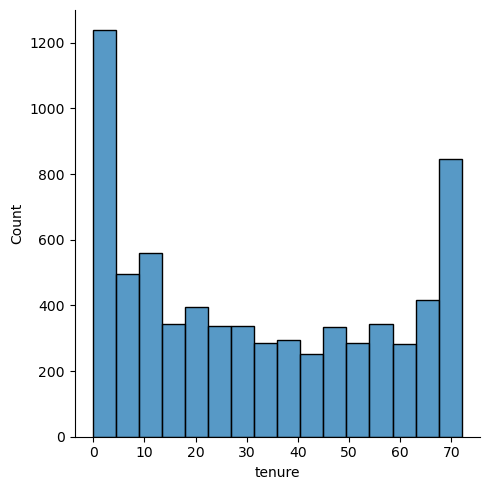

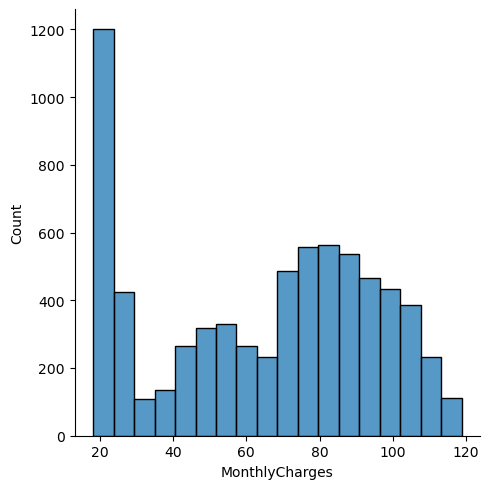

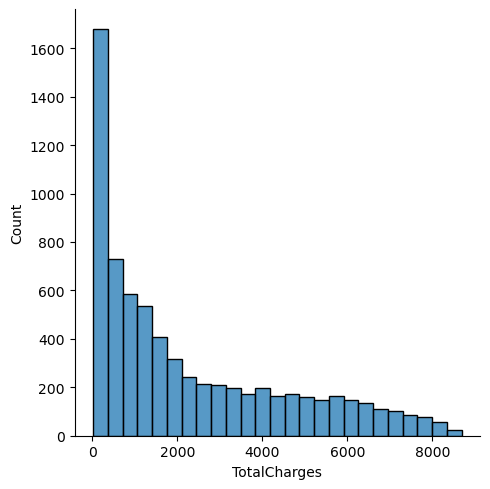

In [13]:
for item in numericCol:
    sns.displot(df[item])
plt.show()

**ค่าของ numeric columns ไม่ได้ผิดเพี้ยน เช่น จำนวนเดือนที่ใช้บริการติดลบ**

# Train Test Split

In [14]:
nominalCol = nominalCol.drop("Churn")

In [15]:
X = df.drop("Churn",axis=1)
y = df.Churn

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# pipline Columns transform

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



In [18]:
numericPipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('std', StandardScaler())
    ]
)

In [19]:
transfomer = make_column_transformer(
    (numericPipeline , ['TotalCharges']),
    (OneHotEncoder(), nominalCol)
)

In [20]:
transfomer.fit(X_train)
X_train_transformed = transfomer.transform(X_train)
X_test_transformed = transfomer.transform(X_test)

# GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_grid_search = KNeighborsClassifier()
parameter_grid={'n_neighbors':[15,17,19,21,23,25,27,29,31,35],
'weights':["uniform","distance"],
'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [23]:
grid_search_transformed = GridSearchCV(knn_grid_search,parameter_grid,cv=10)

In [24]:
grid_search_transformed.fit(X_train_transformed,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [15, 17, 19, 21, 23, 25, 27, 29, 31,
                                         35],
                         'weights': ['uniform', 'distance']})

<h2> Accuracy Train </h2>

In [25]:
grid_search_transformed.score(X_train_transformed,y_train)

0.8040468583599574

In [26]:
grid_search_transformed.score(X_test_transformed,y_test)

0.8048261178140526